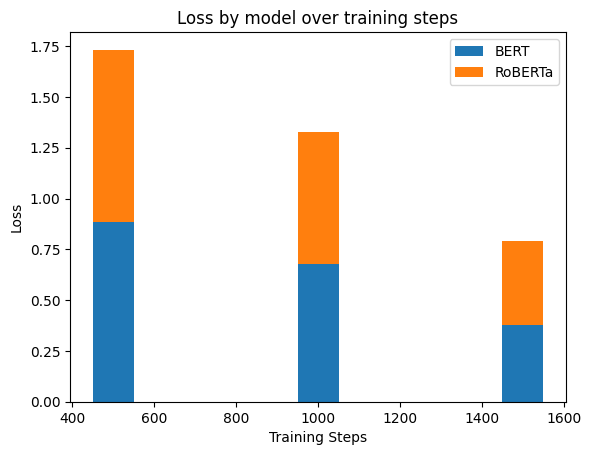

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# 加载BERT和RoBERTa的结果
with open('./results/checkpoint-1500/trainer_state.json', 'r') as f:
    bert_data = json.load(f)

with open('./results_RoBERTa/checkpoint-1500/trainer_state.json', 'r') as f:
    roberta_data = json.load(f)

# 从log_history中提取loss数据
bert_losses = [entry['loss'] for entry in bert_data['log_history']]
roberta_losses = [entry['loss'] for entry in roberta_data['log_history']]

# 使用matplotlib生成堆叠柱状图
steps = [entry['step'] for entry in bert_data['log_history']]
width = 100     

fig, ax = plt.subplots()

ax.bar(steps, bert_losses, width, label='BERT')
ax.bar(steps, roberta_losses, width, bottom=bert_losses, label='RoBERTa')

ax.set_ylabel('Loss')
ax.set_xlabel('Training Steps')
ax.set_title('Loss by model over training steps')
ax.legend()

plt.show()



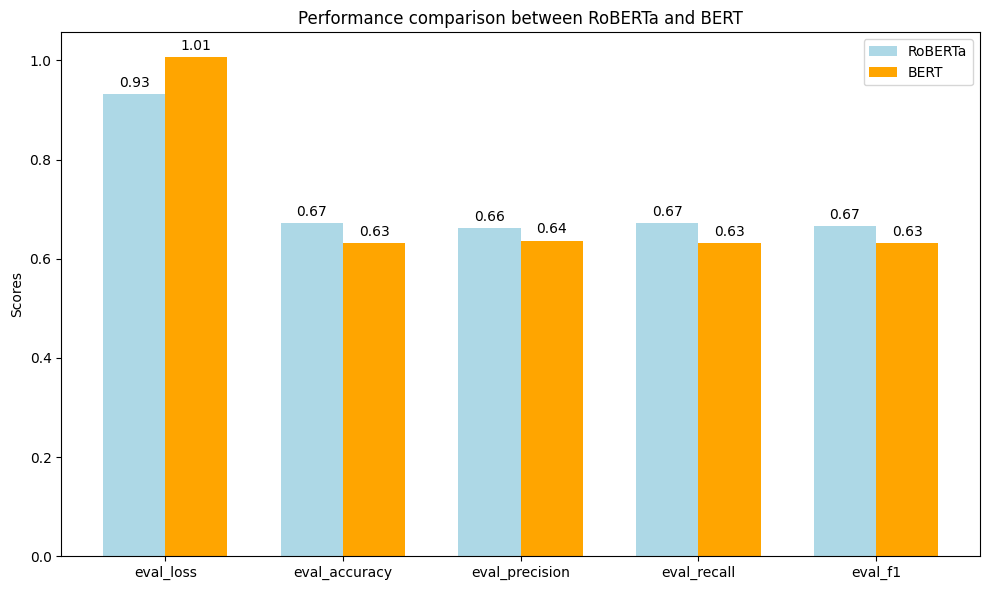

In [6]:
# RoBERTa and BERT performance metrics
roberta_metrics = {
    'eval_loss': 0.9315750002861023,
    'eval_accuracy': 0.6715462031107045,
    'eval_precision': 0.6623653429798128,
    'eval_recall': 0.6715462031107045,
    'eval_f1': 0.6654584891763083
}

bert_metrics = {
    'eval_loss': 1.0064501762390137,
    'eval_accuracy': 0.6312900274473925,
    'eval_precision': 0.6367639792322008,
    'eval_recall': 0.6312900274473925,
    'eval_f1': 0.6317118749492179
}

labels = list(roberta_metrics.keys())
roberta_vals = list(roberta_metrics.values())
bert_vals = list(bert_metrics.values())

x = np.arange(len(labels))  # the label locations
width = 0.35 

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, roberta_vals, width, label='RoBERTa', color='lightblue')
rects2 = ax.bar(x + width/2, bert_vals, width, label='BERT', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance comparison between RoBERTa and BERT')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Autolabel function to display the label on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


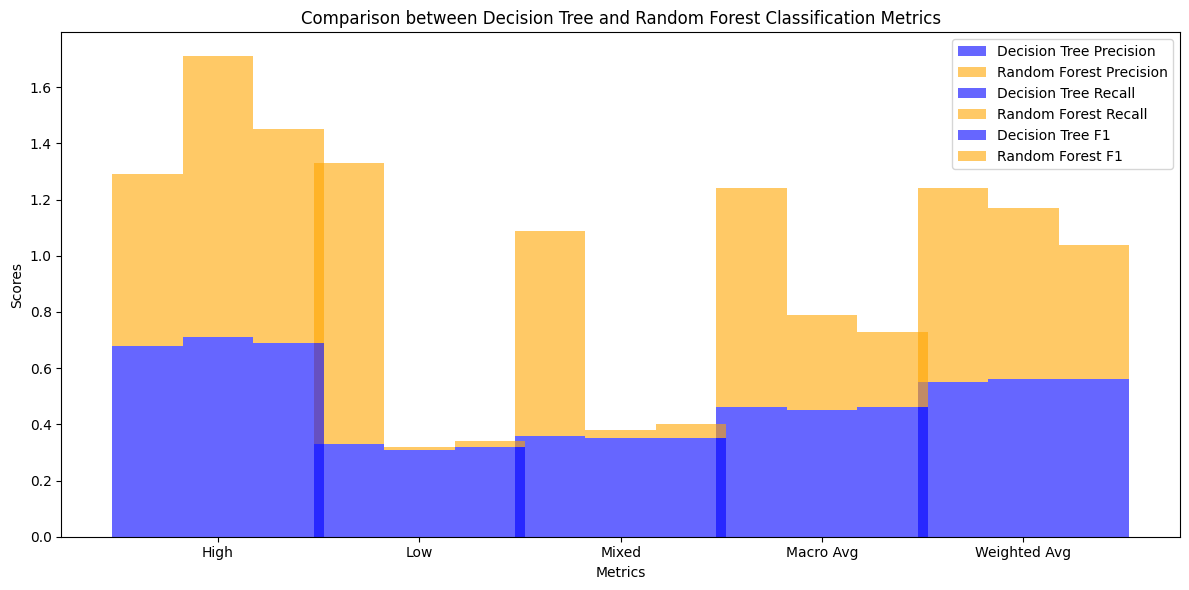

In [8]:
labels = ['High', 'Low', 'Mixed', 'Macro Avg', 'Weighted Avg']

# decision tree data
decision_tree_precision = [0.68, 0.33, 0.36, 0.46, 0.55]
decision_tree_recall = [0.71, 0.31, 0.35, 0.45, 0.56]
decision_tree_f1 = [0.69, 0.32, 0.35, 0.46, 0.56]

# random forest data
random_forest_precision = [0.61, 1.00, 0.73, 0.78, 0.69]
random_forest_recall = [1.00, 0.01, 0.03, 0.34, 0.61]
random_forest_f1 = [0.76, 0.02, 0.05, 0.27, 0.48]

bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(index, decision_tree_precision, bar_width, label='Decision Tree Precision', color='b', alpha=0.6)
bar2 = ax.bar(index, random_forest_precision, bar_width, label='Random Forest Precision', color='orange', alpha=0.6, bottom=decision_tree_precision)

bar3 = ax.bar(index + bar_width, decision_tree_recall, bar_width, label='Decision Tree Recall', color='b', alpha=0.6)
bar4 = ax.bar(index + bar_width, random_forest_recall, bar_width, label='Random Forest Recall', color='orange', alpha=0.6, bottom=decision_tree_recall)

bar5 = ax.bar(index + 2*bar_width, decision_tree_f1, bar_width, label='Decision Tree F1', color='b', alpha=0.6)
bar6 = ax.bar(index + 2*bar_width, random_forest_f1, bar_width, label='Random Forest F1', color='orange', alpha=0.6, bottom=decision_tree_f1)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison between Decision Tree and Random Forest Classification Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


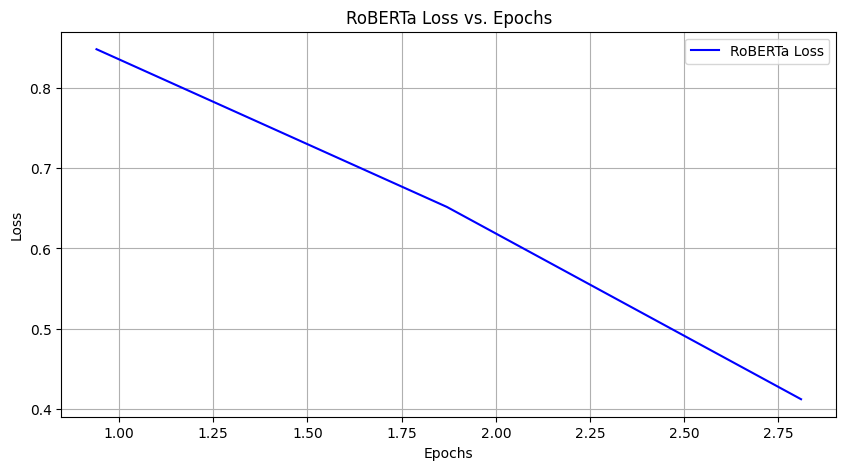

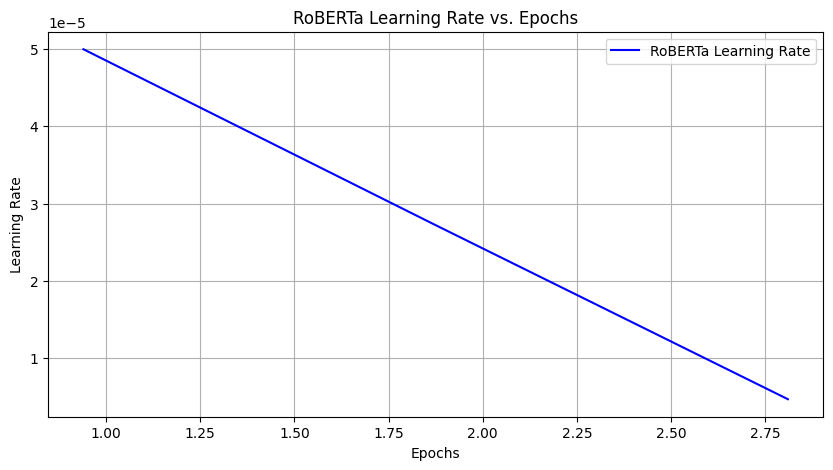

In [10]:
with open('./results_RoBerta/checkpoint-1500/trainer_state.json', 'r') as f:
    roberta_data = json.load(f)

# 提取数据
roberta_epochs = [entry['epoch'] for entry in roberta_data['log_history']]
roberta_loss = [entry['loss'] for entry in roberta_data['log_history']]
roberta_lr = [entry['learning_rate'] for entry in roberta_data['log_history']]

# 绘制loss随epoch变化的折线图
plt.figure(figsize=(10, 5))
plt.plot(roberta_epochs, roberta_loss, label='RoBERTa Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('RoBERTa Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 绘制learning_rate随epoch变化的折线图
plt.figure(figsize=(10, 5))
plt.plot(roberta_epochs, roberta_lr, label='RoBERTa Learning Rate', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('RoBERTa Learning Rate vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()


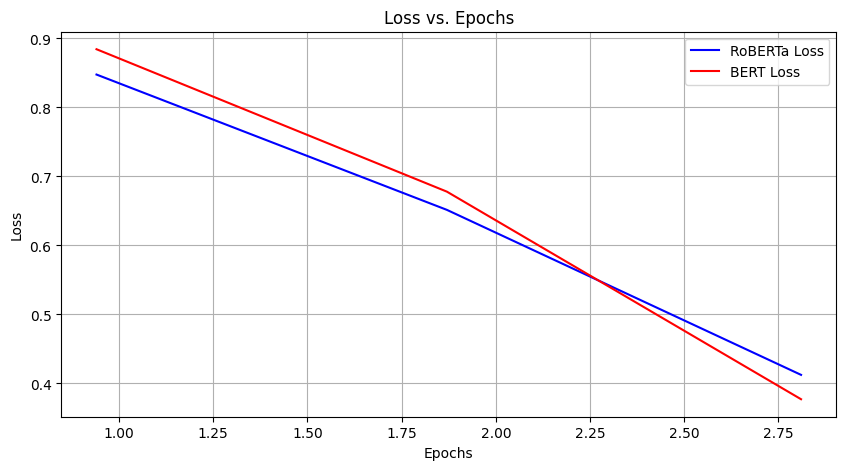

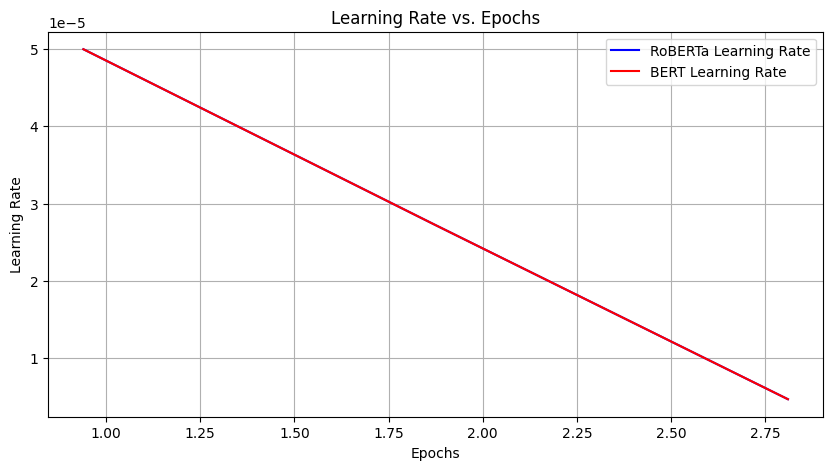

In [9]:
with open('./results_RoBerta/checkpoint-1500/trainer_state.json', 'r') as f:
    roberta_data = json.load(f)

with open('./results/checkpoint-1500/trainer_state.json', 'r') as f:
    bert_data = json.load(f)

# 提取数据
roberta_epochs = [entry['epoch'] for entry in roberta_data['log_history']]
roberta_loss = [entry['loss'] for entry in roberta_data['log_history']]
roberta_lr = [entry['learning_rate'] for entry in roberta_data['log_history']]

bert_epochs = [entry['epoch'] for entry in bert_data['log_history']]
bert_loss = [entry['loss'] for entry in bert_data['log_history']]
bert_lr = [entry['learning_rate'] for entry in bert_data['log_history']]

# 绘制loss随epoch变化的折线图
plt.figure(figsize=(10, 5))
plt.plot(roberta_epochs, roberta_loss, label='RoBERTa Loss', color='blue')
plt.plot(bert_epochs, bert_loss, label='BERT Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()

# 绘制learning_rate随epoch变化的折线图
plt.figure(figsize=(10, 5))
plt.plot(roberta_epochs, roberta_lr, label='RoBERTa Learning Rate', color='blue')
plt.plot(bert_epochs, bert_lr, label='BERT Learning Rate', color='red')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate vs. Epochs')
plt.legend()
plt.grid(True)
plt.show()


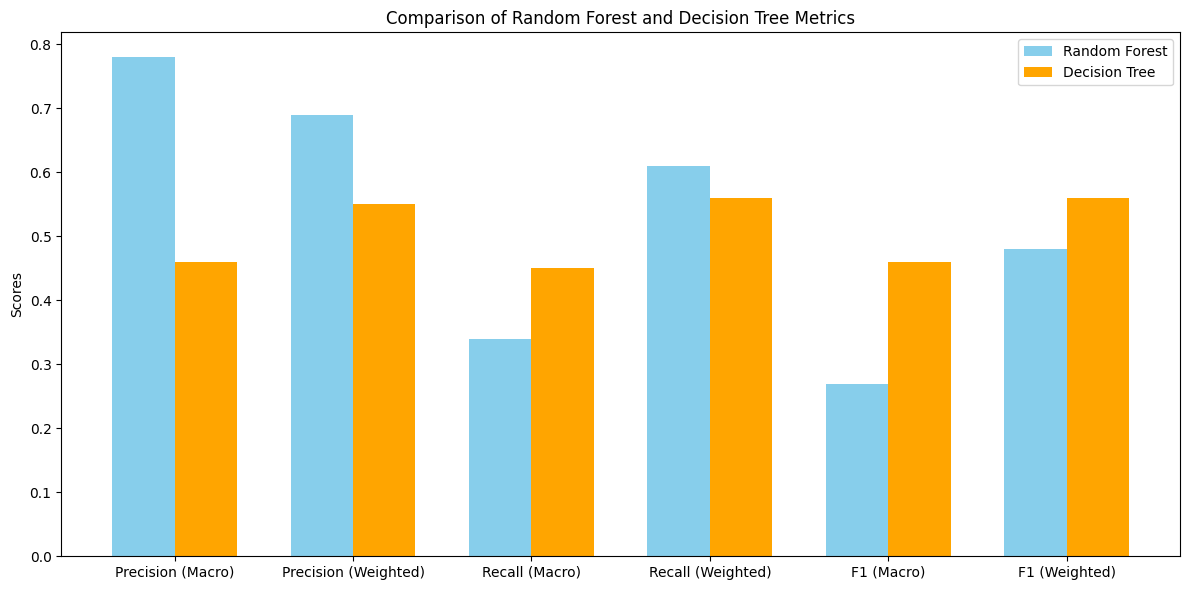

In [16]:
labels = ['Precision (Macro)', 'Precision (Weighted)', 'Recall (Macro)', 'Recall (Weighted)', 'F1 (Macro)', 'F1 (Weighted)']

# Scores for Random Forest
rf_scores = [0.78, 0.69, 0.34, 0.61, 0.27, 0.48]

# Scores for Decision Tree
dt_scores = [0.46, 0.55, 0.45, 0.56, 0.46, 0.56]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, rf_scores, width, label='Random Forest', color='skyblue')
rects2 = ax.bar(x + width/2, dt_scores, width, label='Decision Tree', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Comparison of Random Forest and Decision Tree Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()



